### Importing the libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the datasets

In [26]:
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

### EDA - Exploratory Data Analysis


### Inspecting the datasets

In [30]:
print("Customers Dataset:\n", customers.head())
print("Products Dataset:\n", products.head())
print("Transactions Dataset:\n", transactions.head())


Customers Dataset:
   CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
Products Dataset:
   ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
Transactions Dataset:
   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166  

### Checking for missing values

In [33]:
print("Missing values in Customers:\n", customers.isnull().sum())
print("Missing values in Products:\n", products.isnull().sum())
print("Missing values in Transactions:\n", transactions.isnull().sum())

Missing values in Customers:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Missing values in Products:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Missing values in Transactions:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


### Summary statistics

In [36]:
print("Transactions Summary:\n", transactions.describe())



Transactions Summary:
           Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


### Merge datasets for comprehensive analysis


In [39]:
merged_data = transactions.merge(products, on="ProductID", how="left")
merged_data = merged_data.merge(customers, on="CustomerID", how="left")



### Business Insights

### Total revenue by region


In [43]:
revenue_by_region = merged_data.groupby("Region")["TotalValue"].sum().reset_index()
print("Revenue by Region:\n", revenue_by_region)

Revenue by Region:
           Region  TotalValue
0           Asia   152074.97
1         Europe   166254.63
2  North America   152313.40
3  South America   219352.56


###  Most popular product categories


In [46]:
popular_categories = merged_data["Category"].value_counts().reset_index()
popular_categories.columns = ["Category", "Count"]
print("Most Popular Categories:\n", popular_categories)

Most Popular Categories:
       Category  Count
0        Books    270
1  Electronics    254
2   Home Decor    248
3     Clothing    228


### Average transaction value by region

In [49]:
avg_transaction_by_region = merged_data.groupby("Region")["TotalValue"].mean().reset_index()
print("Average Transaction Value by Region:\n", avg_transaction_by_region)


Average Transaction Value by Region:
           Region  TotalValue
0           Asia  697.591606
1         Europe  710.489872
2  North America  624.235246
3  South America  721.554474


### Customer lifetime value


In [52]:
customer_lifetime_value = merged_data.groupby("CustomerID")["TotalValue"].sum().reset_index()
customer_lifetime_value.columns = ["CustomerID", "LifetimeValue"]
print("Customer Lifetime Value:\n", customer_lifetime_value.head())

Customer Lifetime Value:
   CustomerID  LifetimeValue
0      C0001        3354.52
1      C0002        1862.74
2      C0003        2725.38
3      C0004        5354.88
4      C0005        2034.24


### Monthly transaction trends

In [73]:
merged_data["TransactionDate"] = pd.to_datetime(merged_data["TransactionDate"])
merged_data["Month"] = merged_data["TransactionDate"].dt.to_period("M")
monthly_trends = merged_data.groupby("Month")["TotalValue"].sum().reset_index()
monthly_trends["Month"] = monthly_trends["Month"].astype(str) 
print("Monthly Transaction Trends:\n", monthly_trends)

Monthly Transaction Trends:
       Month  TotalValue
0   2023-12     3769.52
1   2024-01    66376.39
2   2024-02    51459.27
3   2024-03    47828.73
4   2024-04    57519.06
5   2024-05    64527.74
6   2024-06    48771.18
7   2024-07    71366.39
8   2024-08    63436.74
9   2024-09    70603.75
10  2024-10    47063.22
11  2024-11    38224.37
12  2024-12    59049.20


### Data Visualization

### Revenue by Region

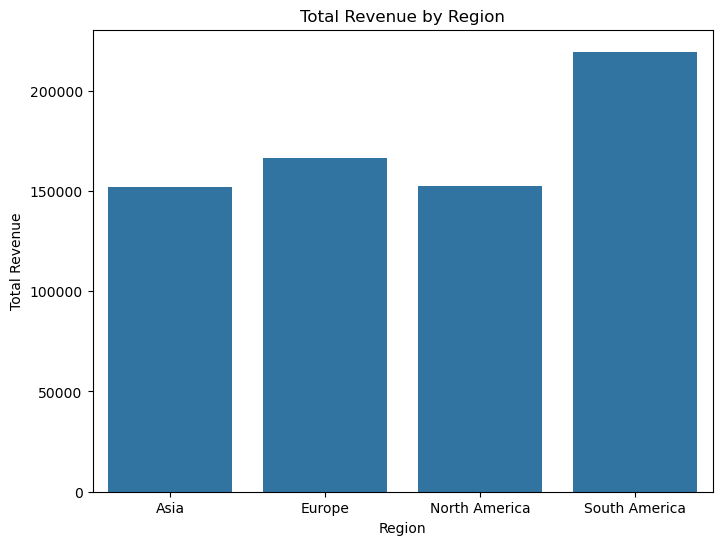

In [59]:
plt.figure(figsize=(8, 6))
sns.barplot(x="Region", y="TotalValue", data=revenue_by_region)
plt.title("Total Revenue by Region")
plt.xlabel("Region")
plt.ylabel("Total Revenue")
plt.show()

## Most Popular Categories

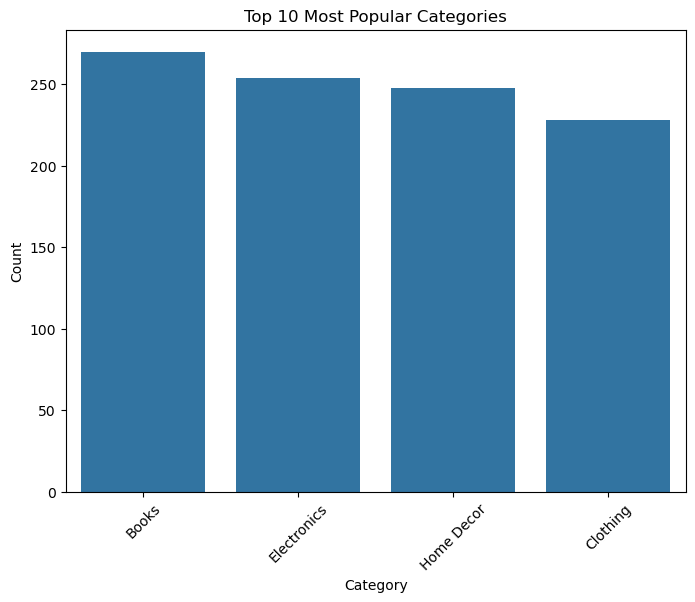

In [61]:
plt.figure(figsize=(8, 6))
sns.barplot(x="Category", y="Count", data=popular_categories.head(10))
plt.title("Top 10 Most Popular Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

### Average Transaction Value by Region



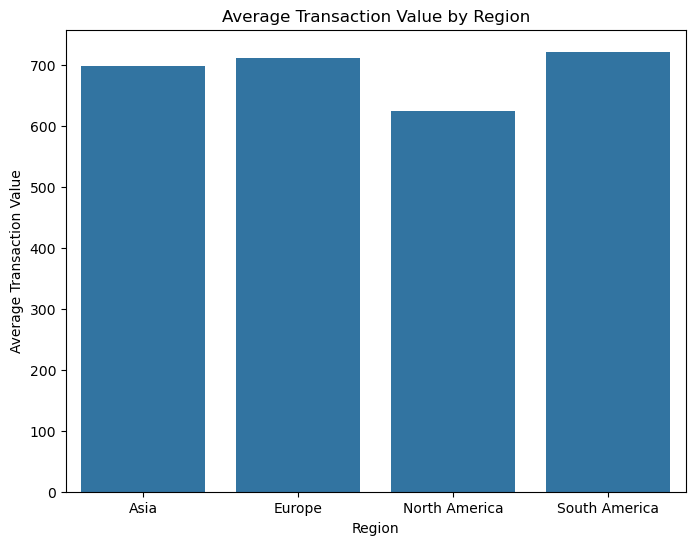

In [64]:
plt.figure(figsize=(8, 6))
sns.barplot(x="Region", y="TotalValue", data=avg_transaction_by_region)
plt.title("Average Transaction Value by Region")
plt.xlabel("Region")
plt.ylabel("Average Transaction Value")
plt.show()

### Monthly Transaction Trends


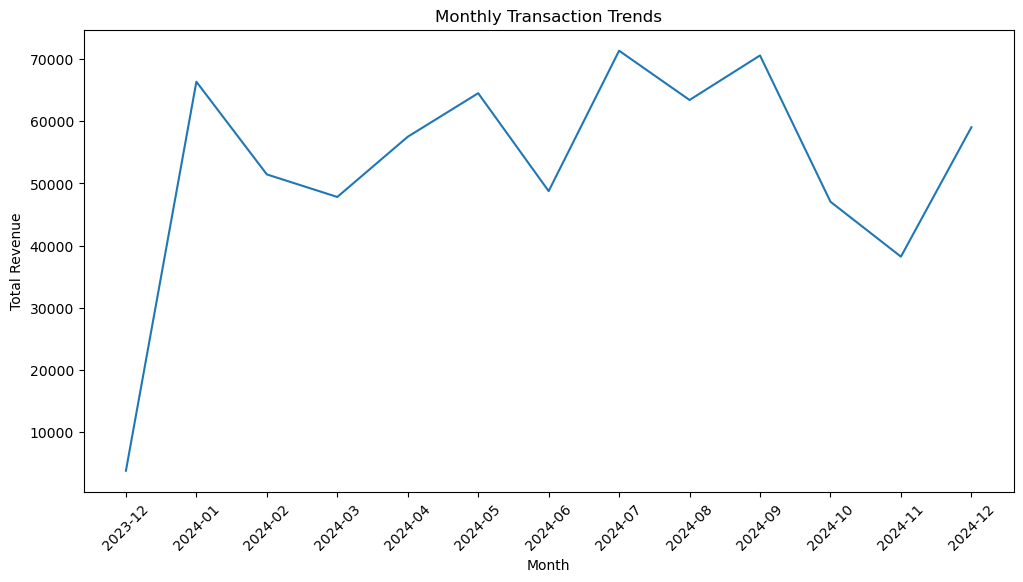

In [66]:
plt.figure(figsize=(12, 6))
sns.lineplot(x="Month", y="TotalValue", data=monthly_trends)
plt.title("Monthly Transaction Trends")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()
